# Test de faisabilité de clsutering via un CNN Transfert Learning

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score




## Préparation du modèle et des données

In [ ]:
# Chargement des données
text_df = pd.read_csv(r'Dataset_projet_pretraitement_textes_images\Flipkart\flipkart_com-ecommerce_sample_1050.csv')

image_files = [f"{id}.jpg" for id in text_df['uniq_id']]
image_folder = r"Dataset_projet_pretraitement_textes_images\Flipkart\Images"
image_paths = [os.path.join(image_folder, f) for f in image_files]
images = [load_img(path, target_size=(224, 224)) for path in image_paths]

c:\Users\manon\anaconda3\envs\projet6_env\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [3]:
print(len(images), "images loaded.")

1050 images loaded.


In [4]:
model = VGG16()
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [7]:
feature_list=[]
for image in images:
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    features = model.predict(image)
    feature_list.append(features.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [10]:
feature_list_np = np.array(feature_list)

feature_list_np.shape

(1050, 4096)

## Analyse de la faisabilité de la custerisation

In [12]:
pca_cnn = PCA(n_components=0.99)
pca_cnn_hist = pca_cnn.fit_transform(feature_list_np)
print("Variance expliquée :", pca_cnn.explained_variance_ratio_)
print("Variance expliquée cumulée :", pca_cnn.explained_variance_ratio_.sum())

Variance expliquée : [8.03090334e-02 6.49624243e-02 4.98068109e-02 3.55147272e-02
 3.22152413e-02 2.43258178e-02 2.26224493e-02 1.90314185e-02
 1.78794488e-02 1.60854552e-02 1.43922232e-02 1.30916703e-02
 1.26115130e-02 1.21222800e-02 1.06803384e-02 1.04935896e-02
 9.98682342e-03 9.53355059e-03 9.28869937e-03 9.09049530e-03
 8.32357723e-03 8.27639829e-03 7.90925696e-03 7.66737806e-03
 7.20114587e-03 6.76153740e-03 6.63224608e-03 6.38302136e-03
 6.06768345e-03 5.79403900e-03 5.61683159e-03 5.49101504e-03
 5.31094940e-03 5.05054696e-03 4.97796573e-03 4.88931267e-03
 4.77951393e-03 4.71780403e-03 4.57257219e-03 4.48458223e-03
 4.32016095e-03 4.18919418e-03 4.03924286e-03 3.97604378e-03
 3.78463254e-03 3.75075312e-03 3.62254935e-03 3.59187112e-03
 3.46525898e-03 3.35227116e-03 3.29618901e-03 3.28520685e-03
 3.16739525e-03 3.08685261e-03 3.02608148e-03 2.98892846e-03
 2.94440147e-03 2.87263282e-03 2.81688408e-03 2.76917941e-03
 2.71668495e-03 2.68482557e-03 2.61935662e-03 2.55792309e-03
 2.

In [14]:
print(f"Dimensions après réduction par l'ACP : {pca_cnn_hist.shape}")

Dimensions après réduction par l'ACP : (1050, 803)


In [16]:
df_cnn = pd.DataFrame(feature_list_np)
print(df_cnn.head())

       0         1     2         3         4        5         6     7     \
0  3.398614  0.859573   0.0  1.106563  2.266121  2.92724  2.446446   0.0   
1  0.000000  0.000000   0.0  1.172007  0.000000  0.00000  0.000000   0.0   
2  0.000000  0.000000   0.0  4.457804  0.000000  0.00000  0.000000   0.0   
3  0.000000  0.070992   0.0  2.046282  0.000000  0.00000  0.000000   0.0   
4  3.417155  0.000000   0.0  0.000000  1.012357  0.00000  0.000000   0.0   

   8         9     ...      4086  4087  4088      4089      4090      4091  \
0   0.0  0.000000  ...  0.485878   0.0   0.0  0.472935  0.875755  0.783683   
1   0.0  6.499795  ...  1.169692   0.0   0.0  0.000000  0.000000  3.152507   
2   0.0  2.820564  ...  0.000000   0.0   0.0  0.000000  0.000000  5.270281   
3   0.0  0.894020  ...  0.000000   0.0   0.0  0.000000  0.000000  3.977749   
4   0.0  0.000000  ...  0.000000   0.0   0.0  0.000000  0.000000  9.195918   

       4092      4093      4094  4095  
0  0.000000  0.000000  0.851055   

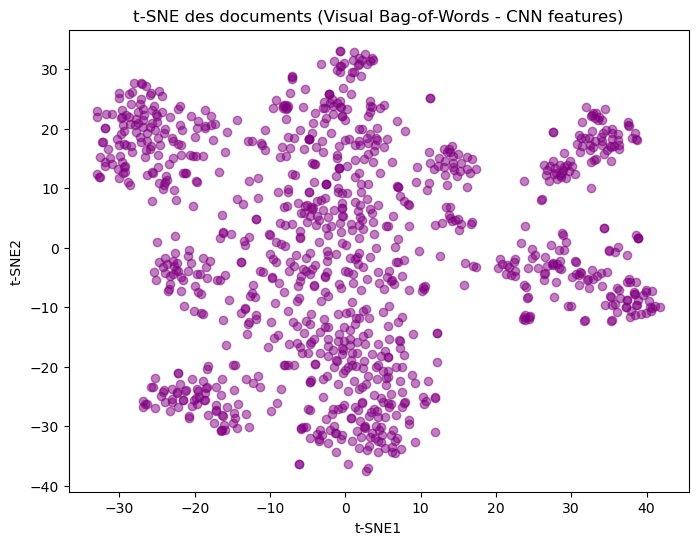

In [19]:
tsne_cnn = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=30)
tsne_cnn_hist = tsne_cnn.fit_transform(pca_cnn_hist)

df_cnn['TSNE1_cnn'] = tsne_cnn_hist[:, 0]
df_cnn['TSNE2_cnn'] = tsne_cnn_hist[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(df_cnn['TSNE1_cnn'], df_cnn['TSNE2_cnn'], c='purple', alpha=0.5)
plt.title('t-SNE des documents (Visual Bag-of-Words - CNN features)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [20]:
def _normalize_cat_str(x):
    if pd.isna(x):
        return ""
    if isinstance(x, list):
        s = " ".join(map(str, x))
    else:
        s = str(x).strip()
        if s.startswith("[") and s.endswith("]"):
            try:
                parsed = ast.literal_eval(s)
                if isinstance(parsed, list):
                    s = " ".join(map(str, parsed))
            except Exception:
                pass
    s = s.replace("&gt;", ">>").replace("&amp;", "&")
    return s.strip(" []'\"")

def _split_levels(s):
    if not s:
        return []
    if ">>" in s:
        parts = [p.strip() for p in s.split(">>") if p.strip()]
    else:
        parts = [p.strip() for p in re.split(r'\s*>\s*', s) if p.strip()]
    return parts

def extract_first_level(x):
    parts = _split_levels(_normalize_cat_str(x))
    return parts[0] if parts else np.nan

text_df['categories'] = text_df['product_category_tree'].apply(extract_first_level)


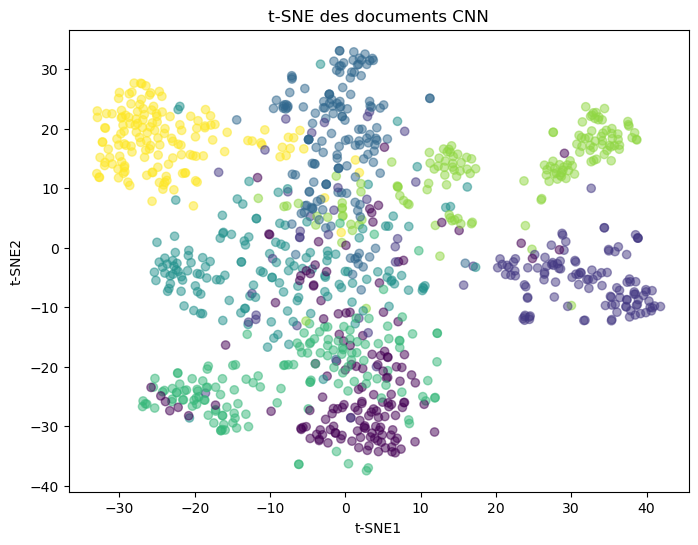

In [21]:
#Pour visualiser suivant les vraies catégories
df_cnn['categories'] = text_df['categories']
df_cnn['cat_code'] = df_cnn['categories'].astype('category').cat.codes

plt.figure(figsize=(8,6))
plt.scatter(df_cnn['TSNE1_cnn'], df_cnn['TSNE2_cnn'], c=df_cnn['cat_code'], alpha=0.5)
plt.title('t-SNE des documents CNN')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [24]:
X_cnn = df_cnn[['TSNE1_cnn', 'TSNE2_cnn']]

kmeans_cnn = KMeans(n_clusters=7, random_state=42)
kmeans_cnn.fit(X_cnn)
df_cnn['cluster_cnn'] = kmeans_cnn.labels_

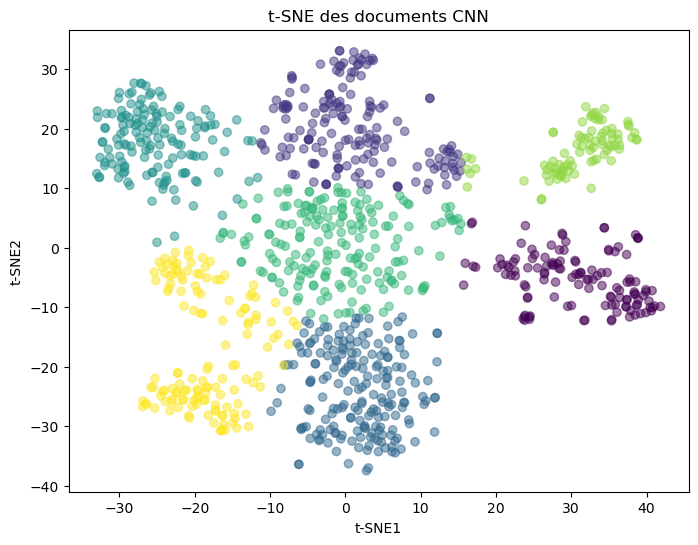

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(df_cnn['TSNE1_cnn'], df_cnn['TSNE2_cnn'], c=df_cnn['cluster_cnn'], alpha=0.5)
plt.title('t-SNE des documents CNN')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [26]:
ari_cnn = adjusted_rand_score(df_cnn['cluster_cnn'], df_cnn['cat_code'])
print(f"ARI = {ari_cnn:.3f}")

ARI = 0.459


Le clustering semble bien meilleur avec ce modèle. La classification automatique semble possible en utilisant cette méthode.